<a href="https://colab.research.google.com/github/MariaZharova/3-day-intensive/blob/main/%D0%9F%D0%BE%D0%B3%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_DS%2C_%D0%B4%D0%B5%D0%BD%D1%8C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

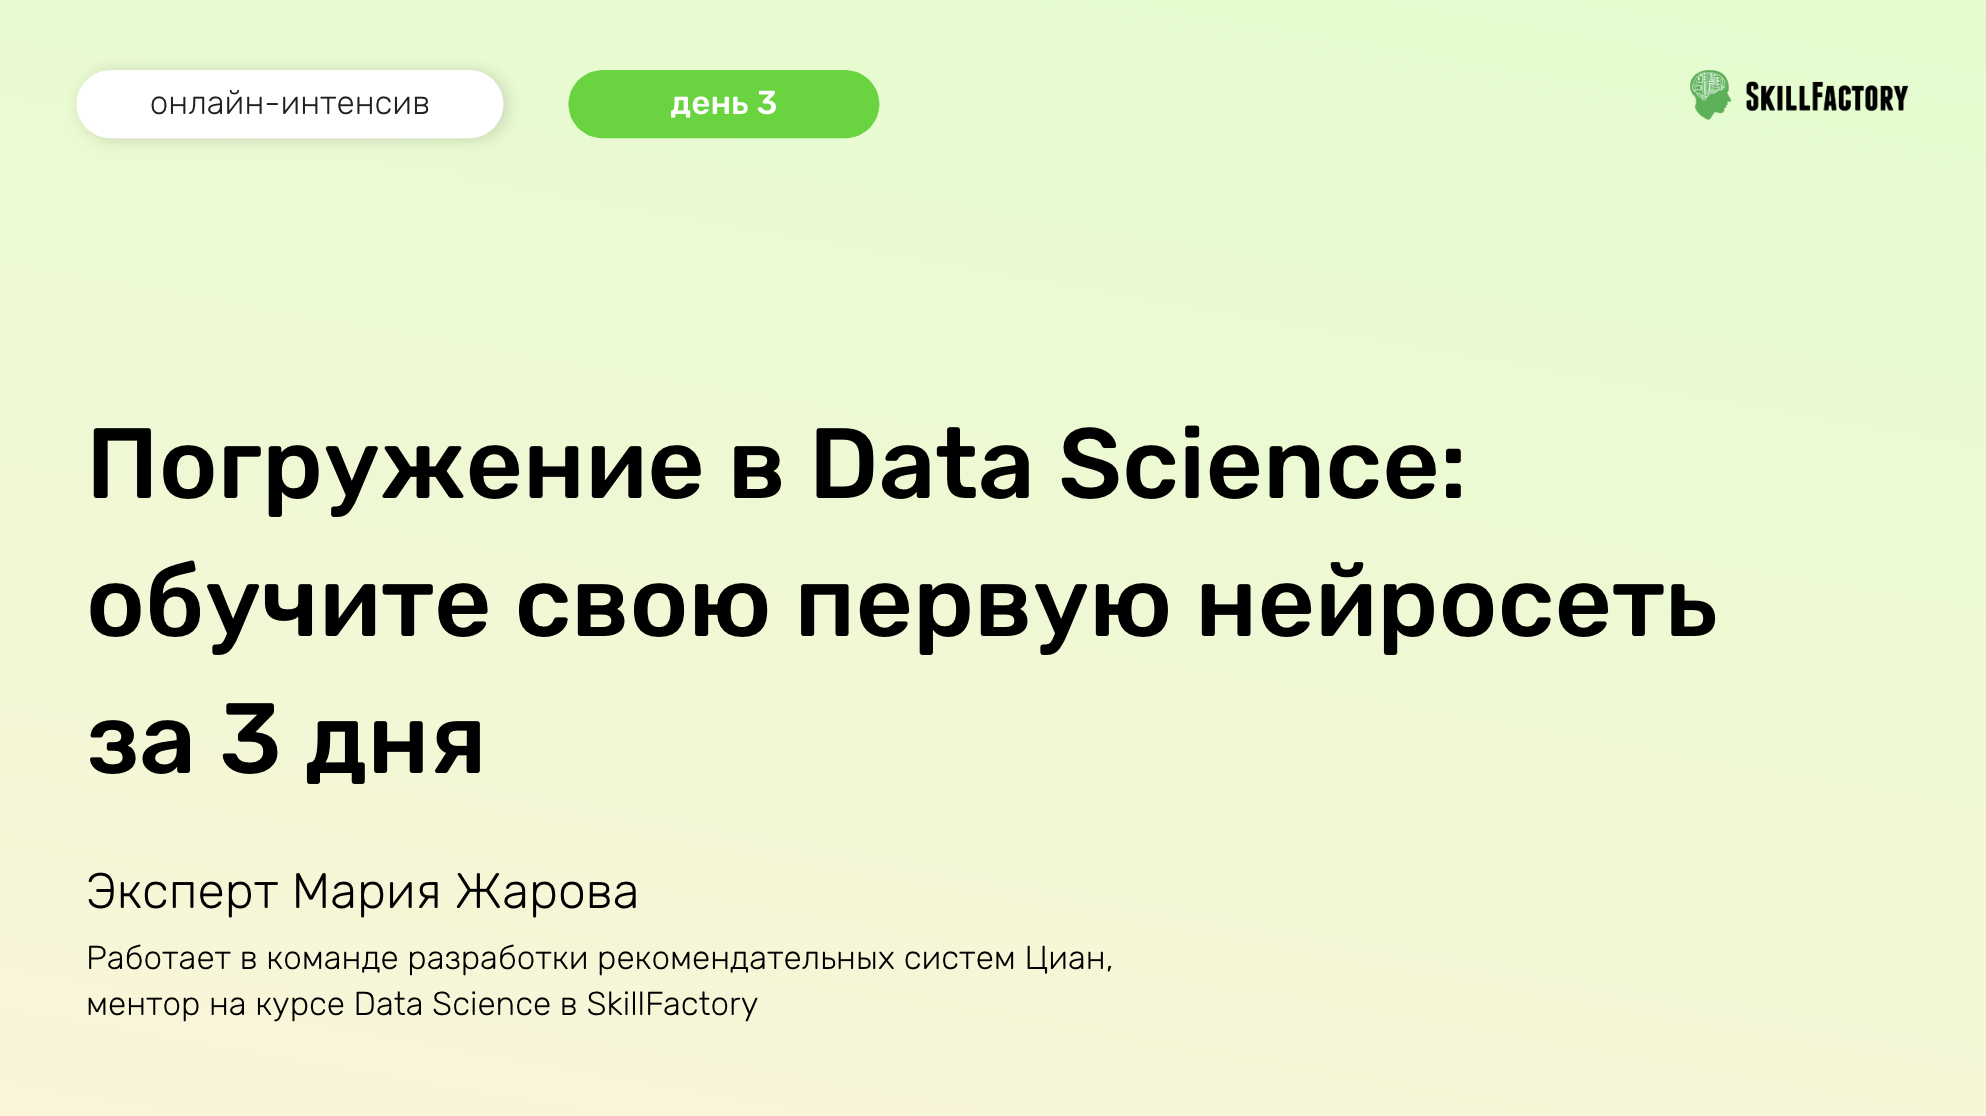

# Задача классификации изображений - распознавание рукописных цифр по фотографии

- MNIST - это большая база данных рукописных цифр, которая обычно используется для обучения различных систем обработки изображений.
- База данных также широко используется для обучения и тестирования в области машинного обучения.
- Набор данных, который мы будем использовать, содержит 70 000 изображений рукописных цифр, среди которых 10 000 зарезервированы для тестирования.
- Этот набор данных подходит для всех, кто хочет начать работу с классификацией изображений с помощью Scikit-Learn.



### Скачивание и обработка данных

In [ ]:
# выгрузка библиотек
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# чтение данных
mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# смотрим на названия колонок
print("Keys: ", mnist_data.keys())

Keys:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
# смотрим на размер данных
print("Shape of Data: ", mnist_data.data.shape)

Shape of Data:  (70000, 784)


In [ ]:
# выделяем таблицу характеристик и целевой столбец
np_data, np_target = mnist_data['data'], mnist_data['target']

In [ ]:
# сейчас столбец строковы, приведём его к численному
np_target = np_target.astype(np.uint8)

In [ ]:
# 10 цифр - длина файла 10 :)
len(np.unique(np_target))

10

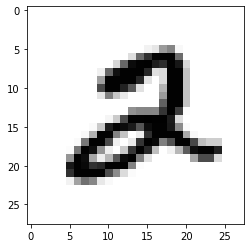

In [ ]:
# посмотрим на одну цифру
some_index = 5
some_digit = np_data.loc[some_index]
some_digit_image = np.array(some_digit).reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis=('off')

In [ ]:
def display_digits(X, y):
    """
       Дан массив изображений цифр X и
       соответствующие значения цифры y,
       эта функция отображает первые 96 изображений и их значения.
    """
    # Figure size (width, height) in inches
    fig = plt.figure(figsize=(8, 6))

    # Adjust the subplots 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(96):
        # Initialize the subplots: 
        # Add a subplot in the grid of 8 by 12, at the i+1-th position
        ax = fig.add_subplot(8, 12, i + 1, xticks=[], yticks=[])
        
        # Display an image at the i-th position
        ax.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')
       
        # label the image with the target value
        ax.text(0, 7, str(y[i]))

    # Show the plot
    plt.show()

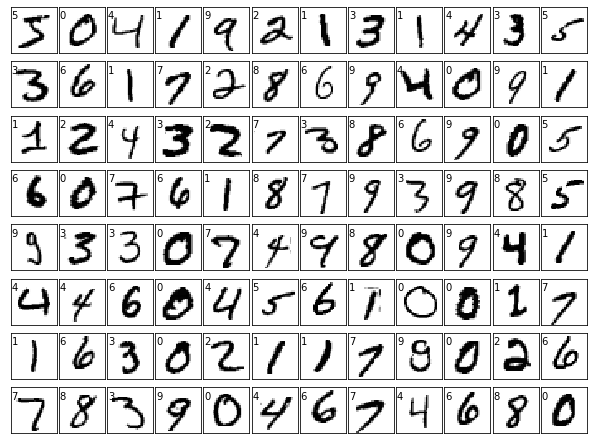

In [ ]:
# посмотрим на эти 96 цифр:)
display_digits(np.array(np_data), np.array(np_target))

In [ ]:
# разделим на тренировочные и тестовые данные (в этот раз вручную)
num_train = 60000

X_train = np_data[:num_train]
X_test  = np_data[num_train:]
y_train = np_target[:num_train]
y_test  = np_target[num_train:]

In [ ]:
# напечатаем что в тренировочных, что в тестовых
print('Train Data: ', X_train, '\n', 'Test Data:', X_test, '\n',
     'Train label: ', y_train, '\n', 'Test Label: ', y_test)

Train Data:         pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10

### Модель SGDClassifier

In [ ]:
# создаём и обучаем модель
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)

In [ ]:
#  выделяем наши предсказания
some_digit_predict = sgd_clf.predict([some_digit])
some_digit_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([False])

In [ ]:
# печатаем точность
print('94-96% accuracy might not as impressive as it sounds where there are {:.2f} percent 9s in the dataset'.format(sum(np_target==9)/len(np_target)*100))

94-96% accuracy might not as impressive as it sounds where there are 9.94 percent 9s in the dataset


### Модель RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(X_train, y_train)

In [ ]:
forest_output = forest.predict(X_test)

In [ ]:
print("Random Forest with n_estimators:500")
print(accuracy_score(y_test, forest_output))

Random Forest with n_estimators:500
0.9714


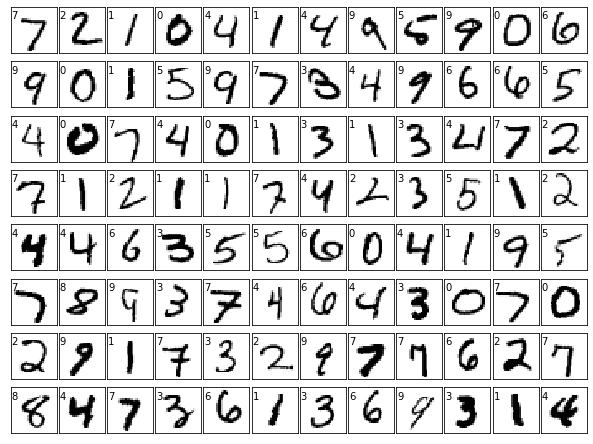

In [ ]:
display_digits(np.array(X_test), np.array(forest_output))